In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("data/clientes_restaurantes.csv")
data

,data,Chimi & Churri,Assa Frão
0,1/1/2016,65.0,139.0
1,1/2/2016,24.0,85.0
2,1/3/2016,24.0,81.0
3,1/4/2016,23.0,32.0
4,1/5/2016,2.0,43.0
...,...,...,...
473,4/18/2017,30.0,18.0
474,4/19/2017,20.0,18.0
475,4/20/2017,22.0,46.0
476,4/21/2017,38.0,38.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            478 non-null    object 
 1   Chimi & Churri  476 non-null    float64
 2   Assa Frão       477 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [4]:
data["data"] = pd.to_datetime(data["data"])
data.set_index("data", inplace=True)
data

,Chimi & Churri,Assa Frão
data,,
2016-01-01,65.0,139.0
2016-01-02,24.0,85.0
2016-01-03,24.0,81.0
2016-01-04,23.0,32.0
2016-01-05,2.0,43.0
...,...,...
2017-04-18,30.0,18.0
2017-04-19,20.0,18.0
2017-04-20,22.0,46.0


# Encontrando Dados Nulos

In [5]:
def show_missing(col):
    missing_numbers = data[col][data[col].isna()].index    
    data[col].plot(figsize=(20, 6))
    
    for i in missing_numbers:
        plt.axvline(x=i, c="red")
    plt.show()

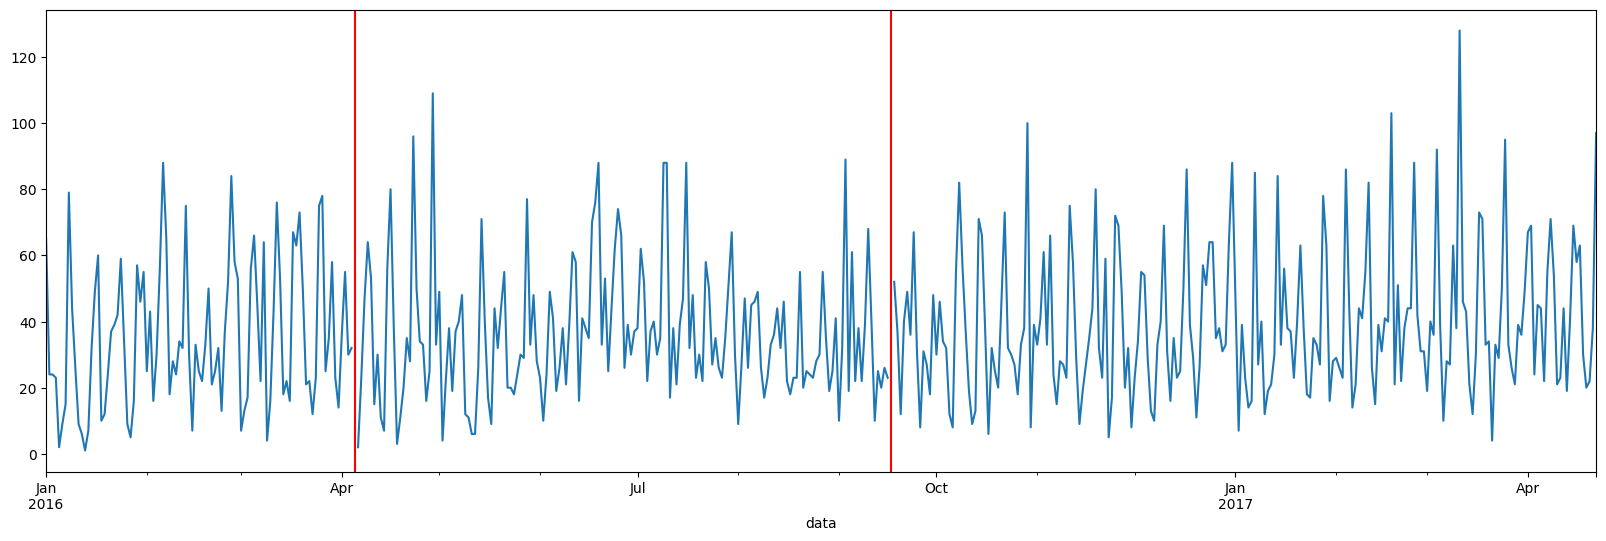

In [6]:
show_missing("Chimi & Churri")

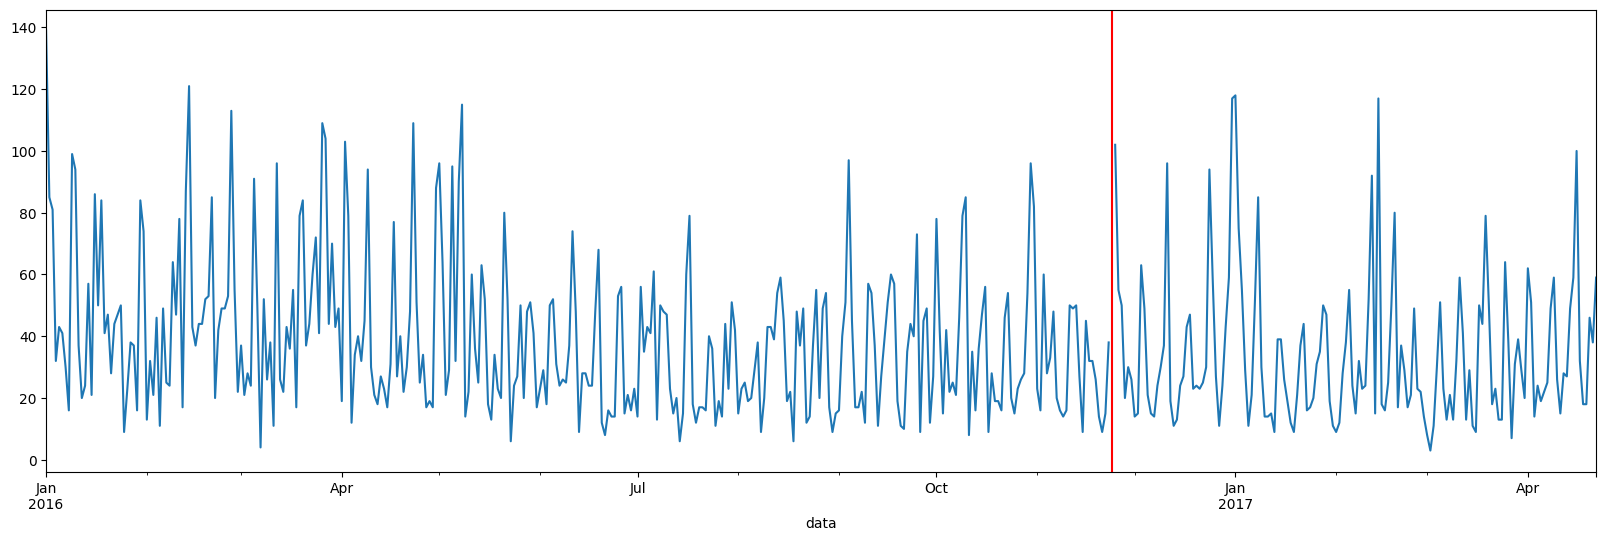

In [7]:
show_missing("Assa Frão")

## Interpolate

In [8]:
data = data.interpolate() 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Chimi & Churri  478 non-null    float64
 1   Assa Frão       478 non-null    float64
dtypes: float64(2)
memory usage: 11.2 KB


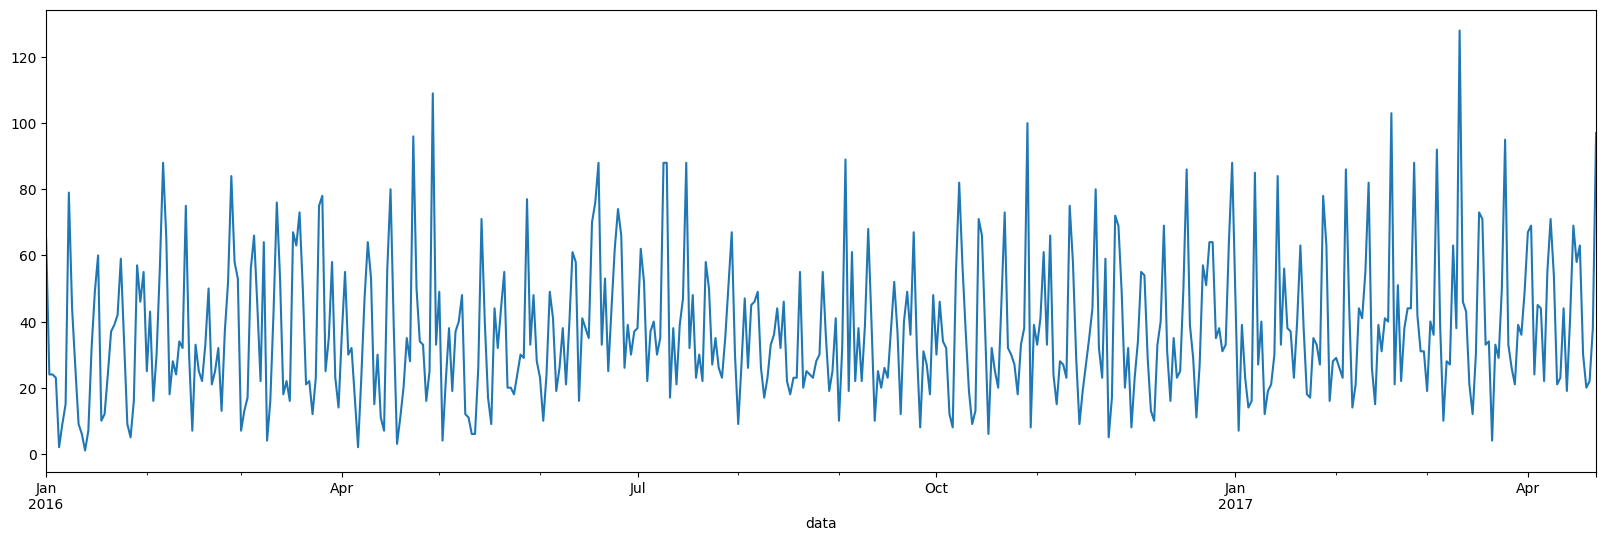

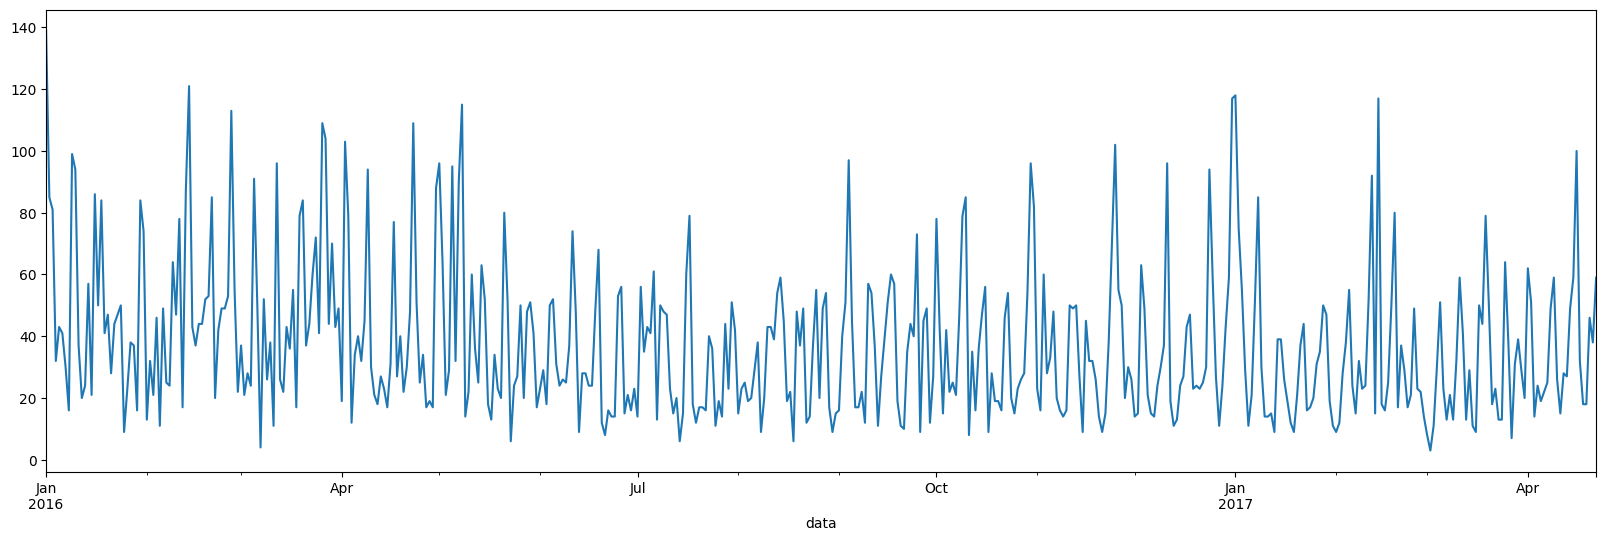

In [9]:
show_missing("Chimi & Churri")
show_missing("Assa Frão")

Note that interpolate generates floating point number (average) and it doesn't make sense for the context of the data. Thus, we must transform it to `int` beforehand

In [10]:
data = data.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Chimi & Churri  478 non-null    int64
 1   Assa Frão       478 non-null    int64
dtypes: int64(2)
memory usage: 11.2 KB


# Primary Analysis

## Analysing Frequencies

Text(0.5, 1.0, 'Distribuição dos dados do Chimi & Churri')

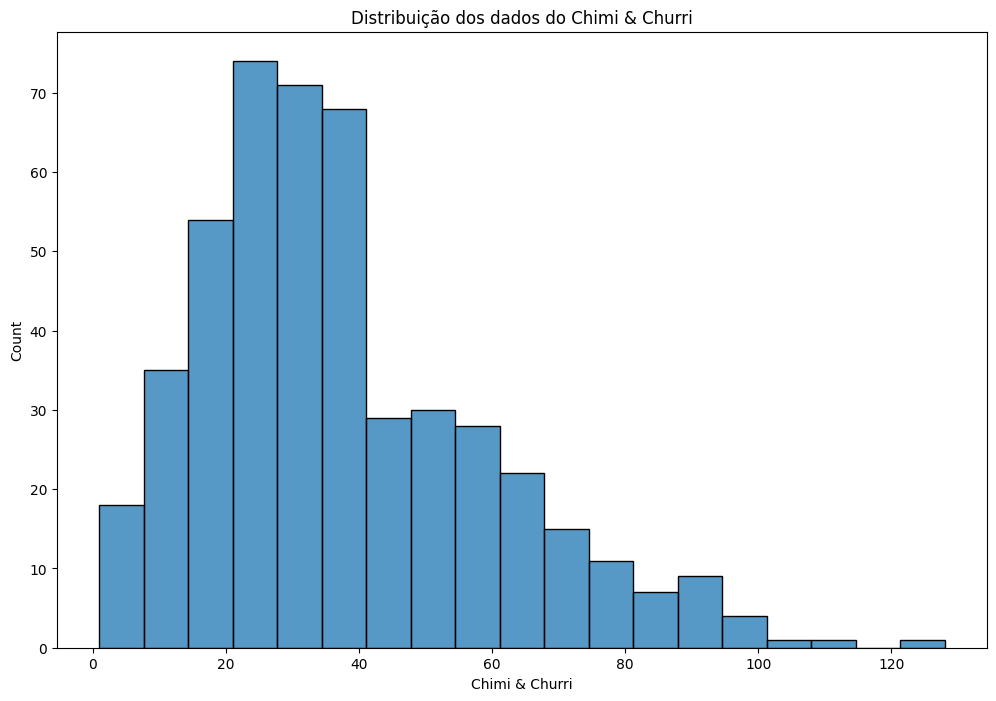

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data["Chimi & Churri"])
plt.title("Distribuição dos dados do Chimi & Churri")

Text(0.5, 1.0, 'Distribuição dos dados do Chimi & Churri')

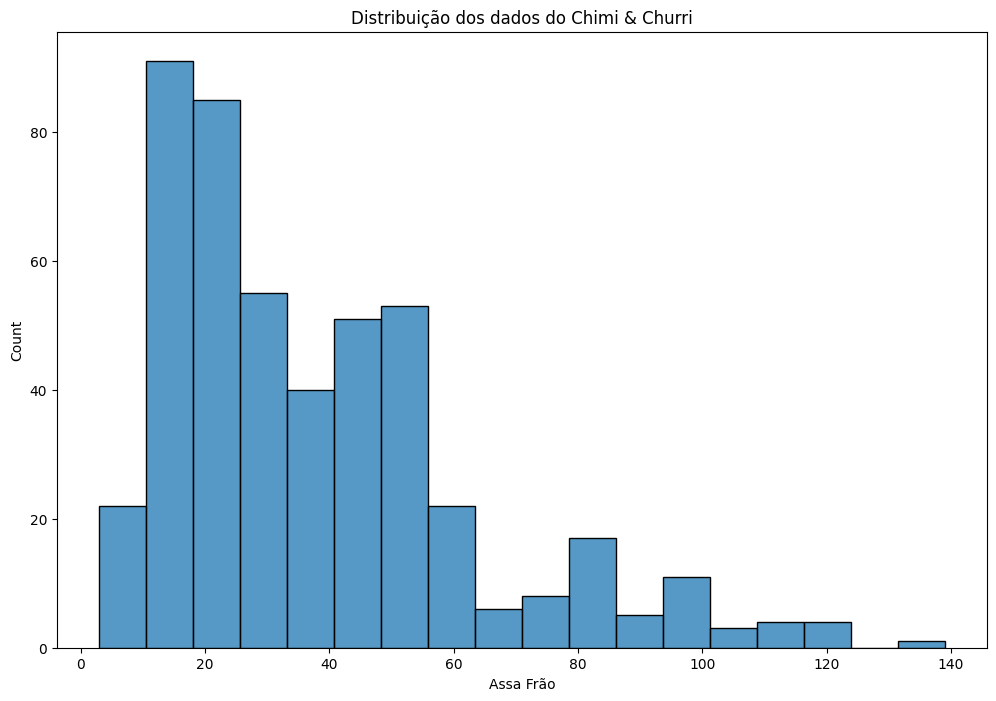

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data["Assa Frão"])
plt.title("Distribuição dos dados do Chimi & Churri")

## BoxPlot

In [13]:
data.describe()

,Chimi & Churri,Assa Frão
count,478.000000,478.000000
mean,37.451883,37.679916
std,21.433061,24.619708
min,1.000000,3.000000
25%,22.250000,19.000000
50%,33.000000,30.500000
75%,49.000000,50.000000
max,128.000000,139.000000


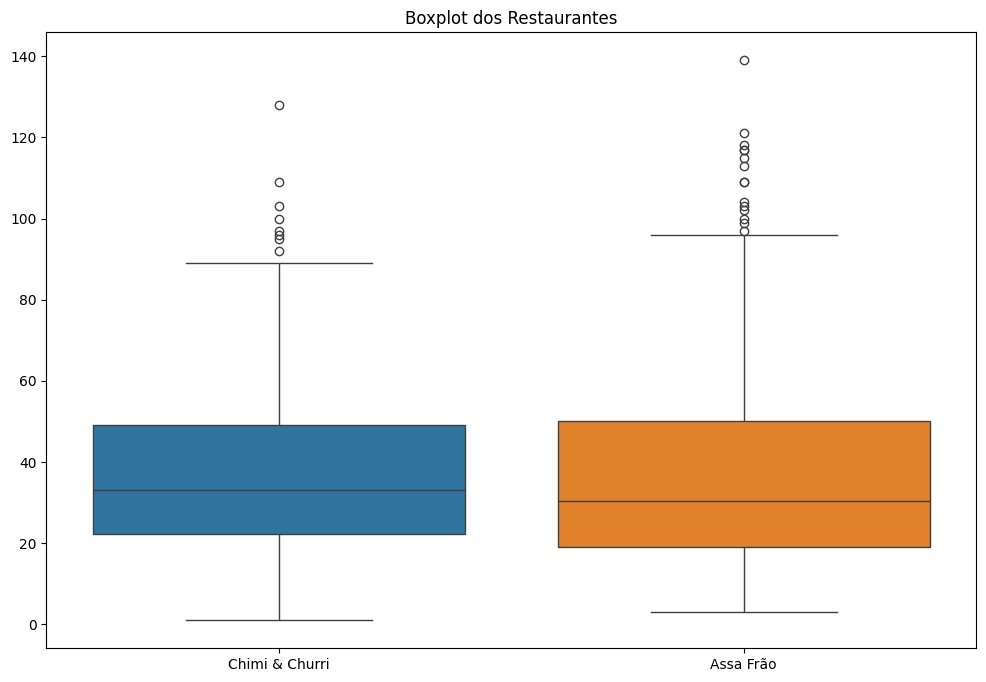

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot dos Restaurantes")
plt.show()

# Unindo as Bases de Dados

In [15]:
data["total"] = data.sum(axis=1)
data

,Chimi & Churri,Assa Frão,total
data,,,
2016-01-01,65,139,204
2016-01-02,24,85,109
2016-01-03,24,81,105
2016-01-04,23,32,55
2016-01-05,2,43,45
...,...,...,...
2017-04-18,30,18,48
2017-04-19,20,18,38
2017-04-20,22,46,68


<Axes: xlabel='total', ylabel='Count'>

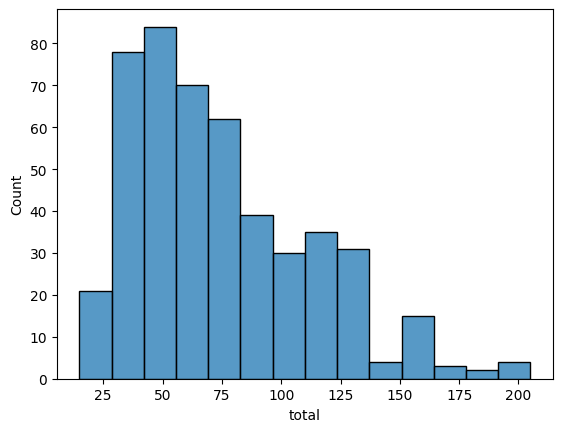

In [16]:
sns.histplot(data["total"])

<Axes: >

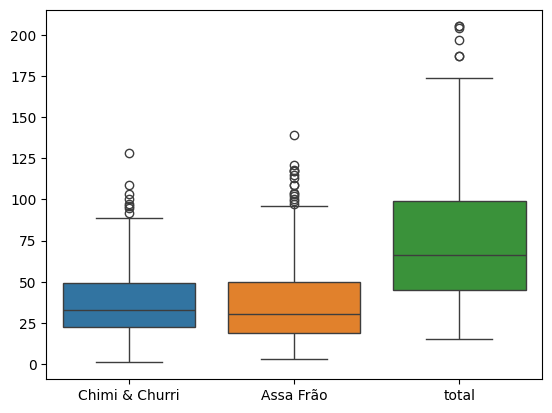

In [17]:
sns.boxplot(data)

In [18]:
from matplotlib import dates

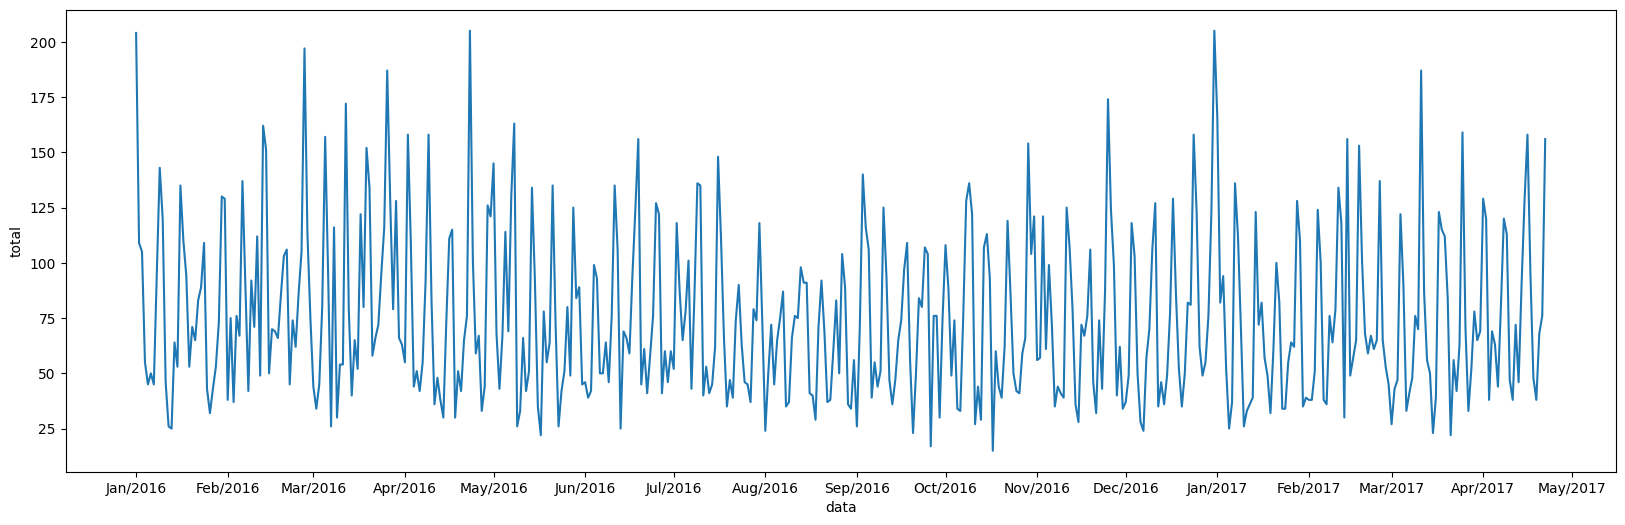

In [19]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=data["total"])
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%b/%Y"))

## Mothly Analysys

In [20]:
clientes_mensais = data.resample(rule="ME")[["Chimi & Churri", "Assa Frão"]].sum()
clientes_mensais

,Chimi & Churri,Assa Frão
data,,
2016-01-31,920,1577
2016-02-29,1109,1396
2016-03-31,1177,1513
2016-04-30,1089,1229
2016-05-31,957,1338
2016-06-30,1262,914
2016-07-31,1299,986
2016-08-31,972,944
2016-09-30,1037,1084


In [21]:
clientes_mensais["Mes"] = clientes_mensais.index.month_name(locale="pt_BR.utf8")
clientes_mensais

,Chimi & Churri,Assa Frão,Mes
data,,,
2016-01-31,920,1577,Janeiro
2016-02-29,1109,1396,Fevereiro
2016-03-31,1177,1513,Março
2016-04-30,1089,1229,Abril
2016-05-31,957,1338,Maio
2016-06-30,1262,914,Junho
2016-07-31,1299,986,Julho
2016-08-31,972,944,Agosto
2016-09-30,1037,1084,Setembro


In [22]:
import matplotlib.ticker as ticker

C:\Users\lreis\AppData\Local\Temp\ipykernel_20452\4246240550.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_minor_formatter(ticker.FixedFormatter(["\n\n2016", "\n\n2017"]))


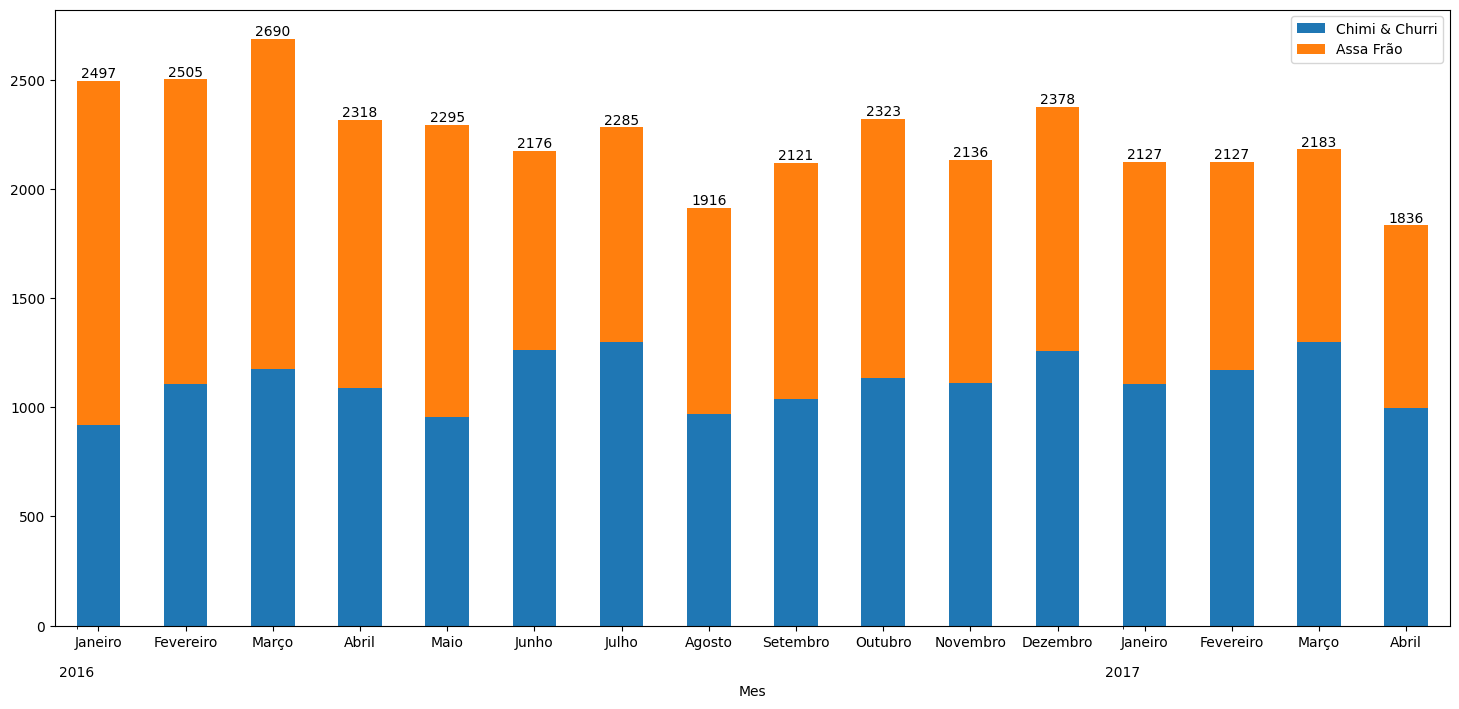

In [23]:
ax = clientes_mensais.plot(x="Mes", kind="bar", stacked=True, rot=0, figsize=(18, 8))
ax.bar_label(ax.containers[1], fontsize=10)
ax.xaxis.set_minor_locator(ticker.IndexLocator(12, 0))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(["\n\n2016", "\n\n2017"]))

# Moving Average - 1 Week

In [24]:
for restaurante in ["Chimi & Churri", "Assa Frão"]:
    data[f"{restaurante}_MM7"] = data[restaurante].rolling(7).mean()

In [25]:
import plotly.express as px

px.line(data,
        x = data.index,
        y = ["Chimi & Churri_MM7", "Assa Frão_MM7"])

## Trend

In [26]:
def show_trend(col):
    plt.title(col)
    data[col].plot(c="darkblue", alpha=0.4, figsize=(20, 4))
    data[f"{col}_MM7"].plot(c="red", figsize=(20, 4))
    plt.show()

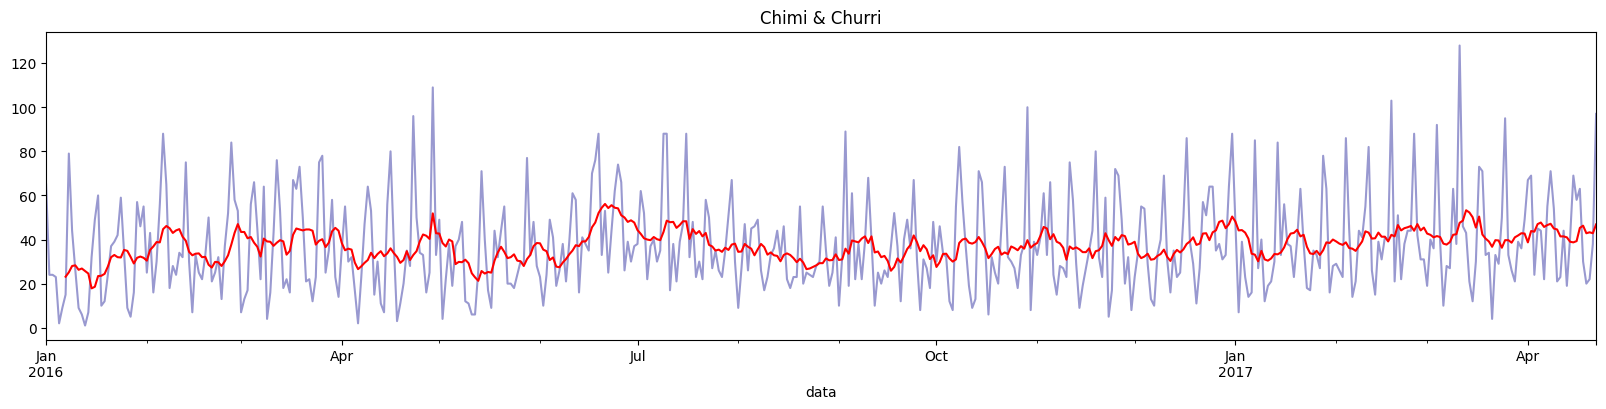

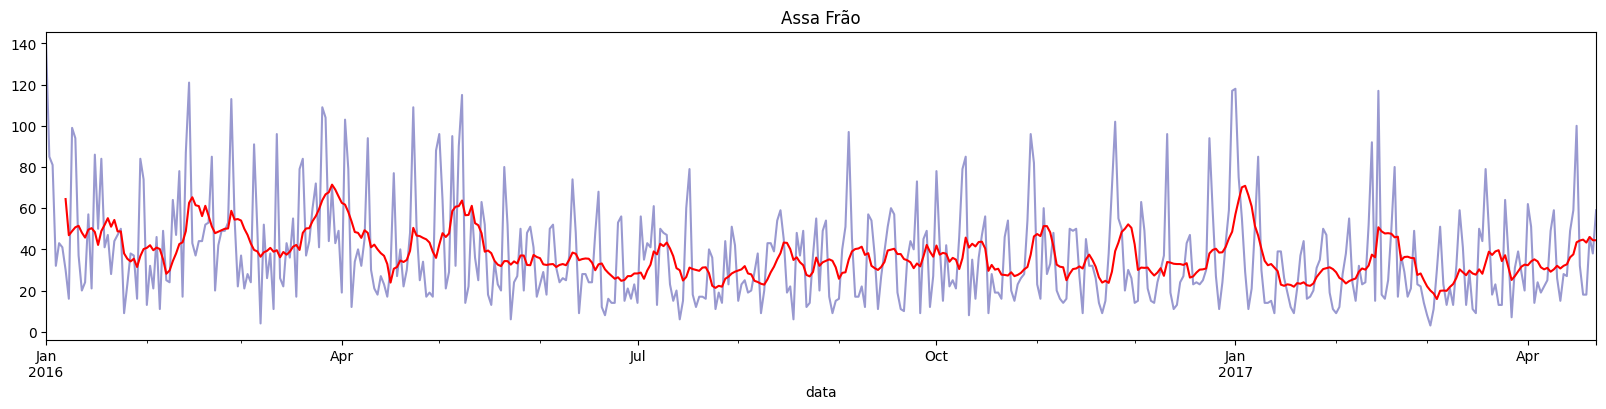

In [27]:
show_trend("Chimi & Churri")
show_trend("Assa Frão")

# Anomaly Detection

In [28]:
data["Dia Semana"] = data.index.day_name(locale="pt_BR.utf8")
data

,Chimi & Churri,Assa Frão,total,Chimi & Churri_MM7,Assa Frão_MM7,Dia Semana
data,,,,,,
2016-01-01,65,139,204,NaN,NaN,Sexta-feira
2016-01-02,24,85,109,NaN,NaN,Sábado
2016-01-03,24,81,105,NaN,NaN,Domingo
2016-01-04,23,32,55,NaN,NaN,Segunda-feira
2016-01-05,2,43,45,NaN,NaN,Terça-feira
...,...,...,...,...,...,...
2017-04-18,30,18,48,46.285714,44.714286,Terça-feira
2017-04-19,20,18,38,42.857143,43.285714,Quarta-feira
2017-04-20,22,46,68,43.285714,46.000000,Quinta-feira


In [29]:
datas_comemorativas = pd.read_csv("data/datas_comemorativas.csv")
datas_comemorativas["data"] = pd.to_datetime(datas_comemorativas["data"])
datas_comemorativas.set_index("data", drop=True, inplace=True)
datas_comemorativas 

,feriado
data,
2016-01-01,Ano novo
2016-02-14,Dia dos namorados
2016-03-25,Sexta-feira santa
2016-03-27,Pascoa
2016-03-28,Domingo de pascoa
2016-05-08,Dia das maes
2016-06-19,Dia dos pais
2016-10-31,Halloween
2016-11-25,Black Friday


In [30]:
data_save = data

In [31]:
data = pd.merge(data_save, datas_comemorativas, how="left", left_index=True, right_index=True)
data

,Chimi & Churri,Assa Frão,total,Chimi & Churri_MM7,Assa Frão_MM7,Dia Semana,feriado
data,,,,,,,
2016-01-01,65,139,204,NaN,NaN,Sexta-feira,Ano novo
2016-01-02,24,85,109,NaN,NaN,Sábado,NaN
2016-01-03,24,81,105,NaN,NaN,Domingo,NaN
2016-01-04,23,32,55,NaN,NaN,Segunda-feira,NaN
2016-01-05,2,43,45,NaN,NaN,Terça-feira,NaN
...,...,...,...,...,...,...,...
2017-04-18,30,18,48,46.285714,44.714286,Terça-feira,NaN
2017-04-19,20,18,38,42.857143,43.285714,Quarta-feira,NaN
2017-04-20,22,46,68,43.285714,46.000000,Quinta-feira,NaN


## ZScore

In [32]:
from scipy.stats import zscore

def detectar_anomalias(col):
    data["zscore"] = zscore(data[col])
    anomalias = data[(data["zscore"] > 3) | (data["zscore"] < -3)]
    return anomalias[[col, "zscore", "Dia Semana", "feriado"]]

In [33]:
anomalias_chimi = detectar_anomalias("Chimi & Churri")
anomalias_assa = detectar_anomalias("Assa Frão")

In [34]:
def show_anomalies(col, anomalias):
    ax = data[col].plot(figsize=(20, 4))
    ax.scatter(anomalias.index, anomalias[col], c="red", label="Outlier")
    plt.title(f"Anomalias {col}")
    plt.legend()
    plt.show()

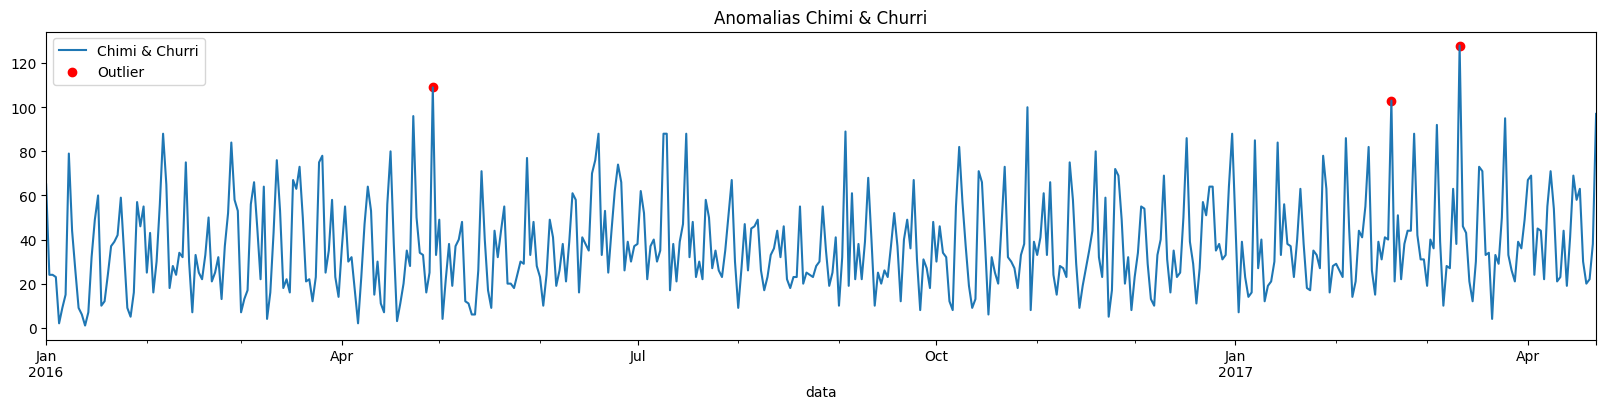

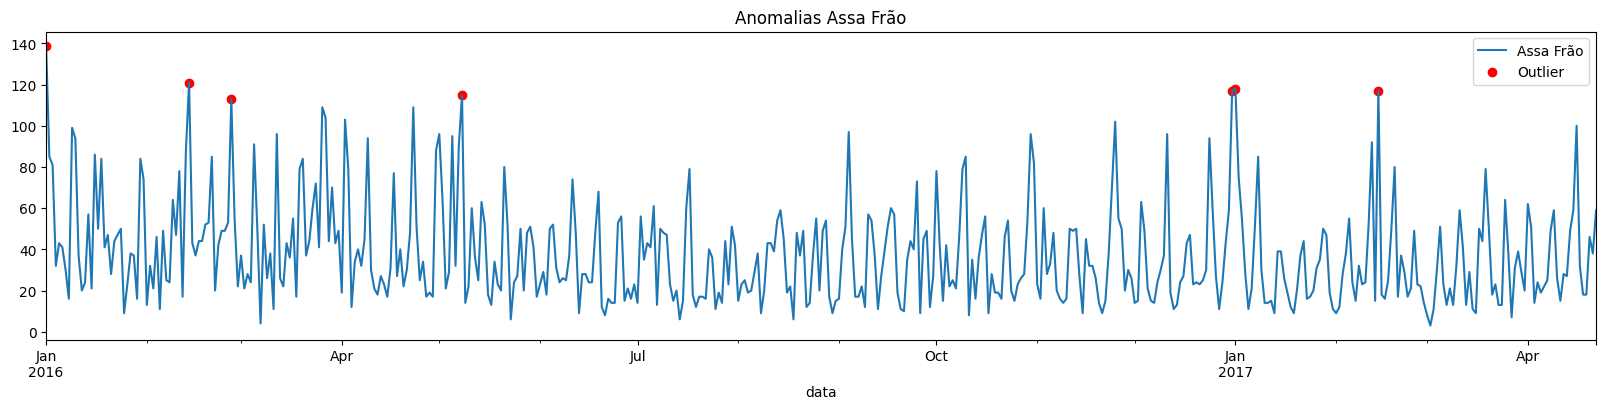

In [35]:
show_anomalies("Chimi & Churri", anomalias_chimi)
show_anomalies("Assa Frão", anomalias_assa)

### Getting Specific Dates

In [36]:
anomalias_chimi

,Chimi & Churri,zscore,Dia Semana,feriado
data,,,,
2016-04-29,109,3.341710,Sexta-feira,NaN
2017-02-18,103,3.061475,Sábado,NaN
2017-03-11,128,4.229120,Sábado,NaN


In [37]:
anomalias_assa

,Assa Frão,zscore,Dia Semana,feriado
data,,,,
2016-01-01,139,4.119717,Sexta-feira,Ano novo
2016-02-14,121,3.387830,Domingo,Dia dos namorados
2016-02-27,113,3.062546,Sábado,NaN
2016-05-08,115,3.143867,Domingo,Dia das maes
2016-12-31,117,3.225188,Sábado,Vespera de ano novo
2017-01-01,118,3.265848,Domingo,Ano novo
2017-02-14,117,3.225188,Terça-feira,Dia dos namorados


# Autocorrelation

In [38]:
!pip install statsmodels

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

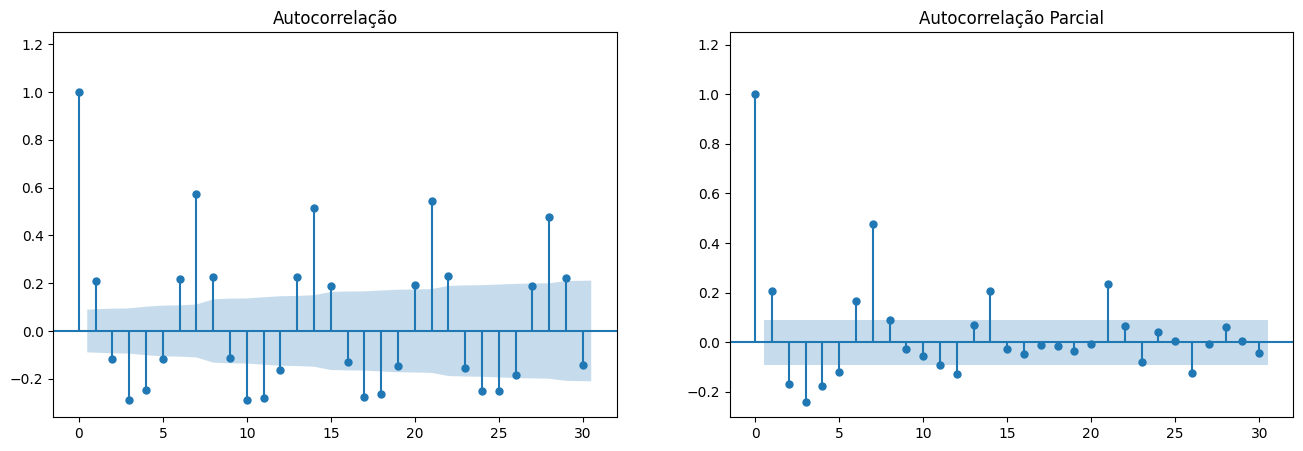

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(data["Chimi & Churri"], lags=30, title="Autocorrelação", auto_ylims=True, ax=axes[0])
plot_pacf(data["Chimi & Churri"], lags=30, title="Autocorrelação Parcial", auto_ylims=True, ax=axes[1])
plt.show()

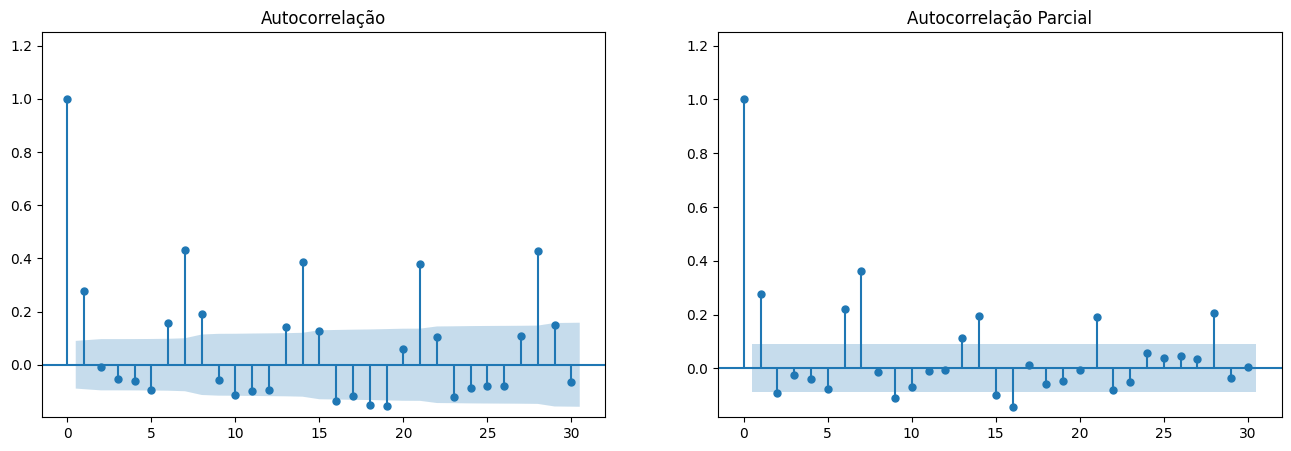

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(data["Assa Frão"], lags=30, title="Autocorrelação", auto_ylims=True, ax=axes[0])
plot_pacf(data["Assa Frão"], lags=30, title="Autocorrelação Parcial", auto_ylims=True, ax=axes[1])
plt.show()

# Decomposition

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao_chimi = seasonal_decompose(data["Chimi & Churri"])
decomposicao_assa = seasonal_decompose(data["Assa Frão"])

In [43]:
def plot_decomposicao(decomposicao, title):
    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(20, 8))
    decomposicao.observed.plot(ax=axs[0], title="Dados Observados")
    decomposicao.trend.plot(ax = axs[1], title="Tendência")
    decomposicao.seasonal.plot(ax = axs[2], title="Sazonalidade")
    decomposicao.resid.plot(ax=axs[3], title="Resíduos")
    plt.suptitle(title)

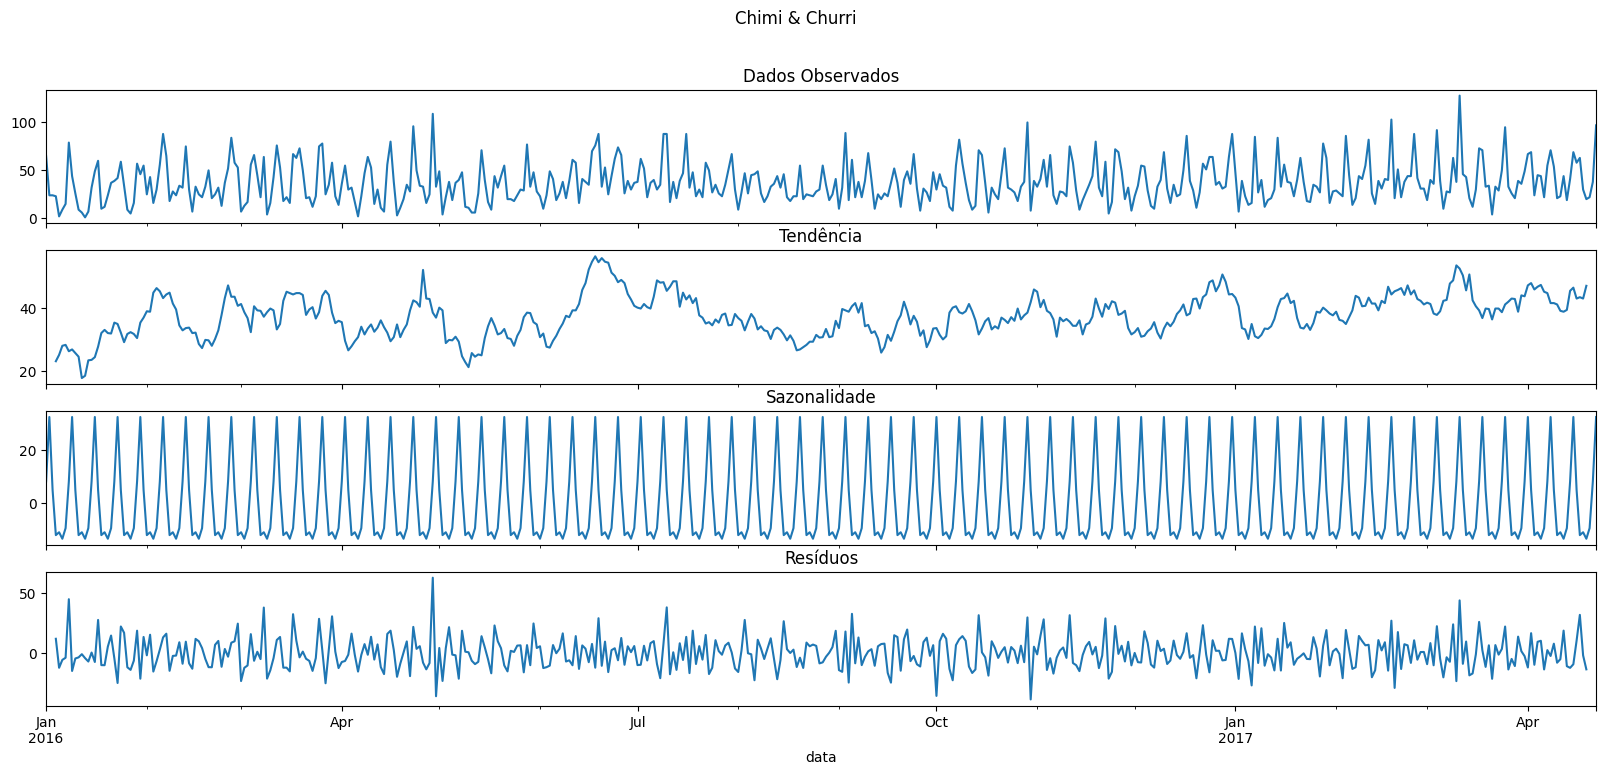

In [44]:
plot_decomposicao(decomposicao_chimi, "Chimi & Churri")

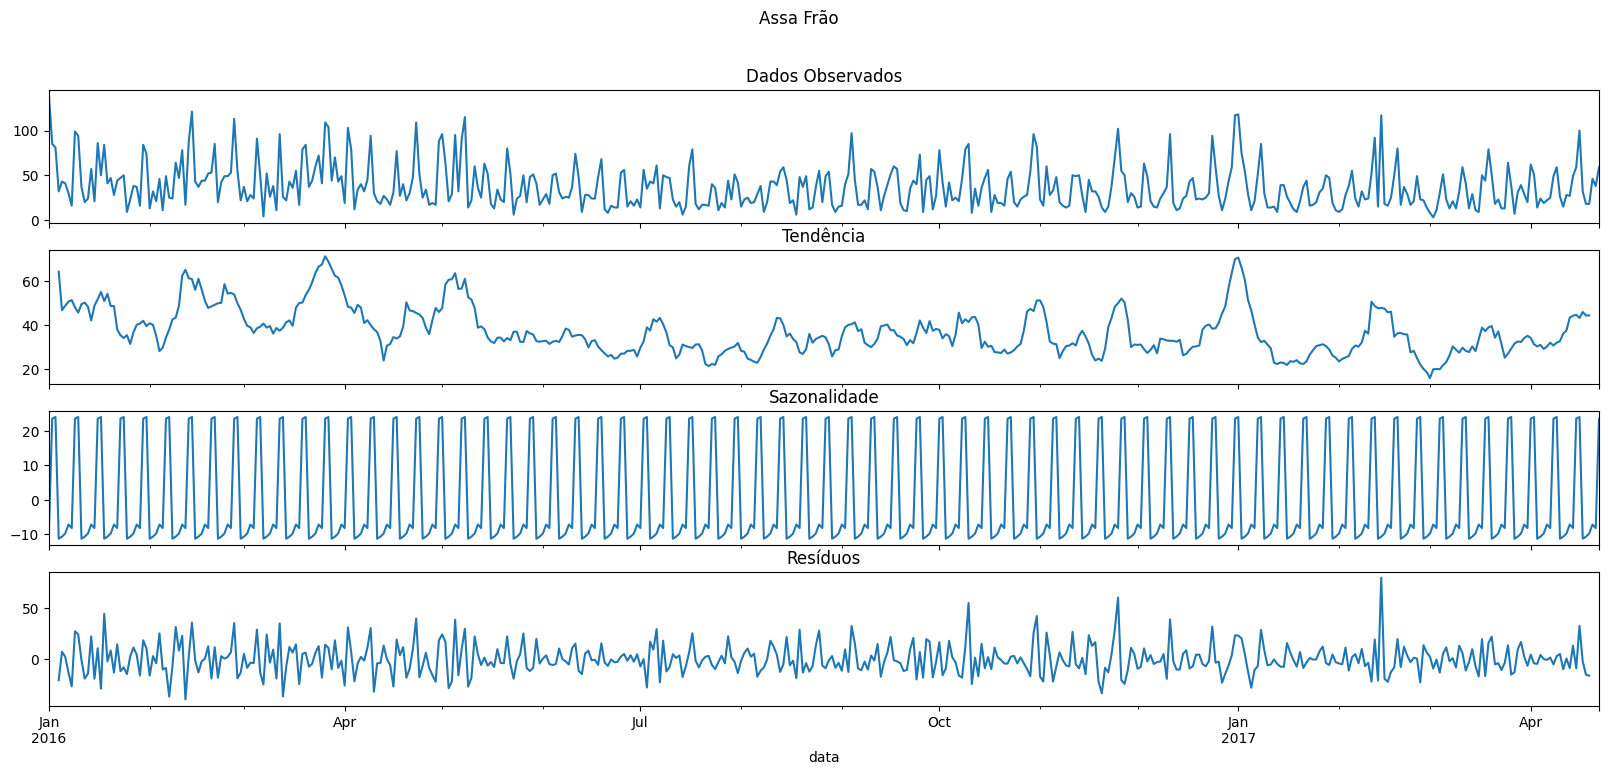

In [45]:
plot_decomposicao(decomposicao_assa, "Assa Frão")

# Understanding Residues

In [53]:
import numpy as np

anomalias_resid_chimi = np.where( np.abs(decomposicao_chimi.resid) > 2.5*np.std(decomposicao_chimi.resid))
print(anomalias_resid_chimi)

anomalias_resid_chimi = data.iloc[anomalias_resid_chimi][["Chimi & Churri", "Dia Semana", "feriado"]]
anomalias_resid_chimi

(array([  7,  67, 119, 120, 191, 274, 303, 435]),)


,Chimi & Churri,Dia Semana,feriado
data,,,
2016-01-08,79,Sexta-feira,NaN
2016-03-08,64,Terça-feira,NaN
2016-04-29,109,Sexta-feira,NaN
2016-04-30,33,Sábado,NaN
2016-07-10,88,Domingo,NaN
2016-10-01,30,Sábado,NaN
2016-10-30,8,Domingo,NaN
2017-03-11,128,Sábado,NaN


In [71]:
anomalias_resid_assa = np.where( np.abs(decomposicao_assa.resid) > 2.5*np.std(decomposicao_assa.resid))
anomalias_resid_assa = data.iloc[anomalias_resid_assa][["Assa Frão", "Dia Semana", "feriado"]]
anomalias_assa

,Assa Frão,zscore,Dia Semana,feriado
data,,,,
2016-01-01,139,4.119717,Sexta-feira,Ano novo
2016-02-14,121,3.387830,Domingo,Dia dos namorados
2016-02-27,113,3.062546,Sábado,NaN
2016-05-08,115,3.143867,Domingo,Dia das maes
2016-12-31,117,3.225188,Sábado,Vespera de ano novo
2017-01-01,118,3.265848,Domingo,Ano novo
2017-02-14,117,3.225188,Terça-feira,Dia dos namorados


In [68]:
def plot_decomposicao(decomposicao, title, outliers=None):
    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(20, 8))
    decomposicao.observed.plot(ax=axs[0], title="Dados Observados")
    if outliers is not None:
        col = outliers.columns.drop("Dia Semana").drop("feriado")[0]
        axs[0].plot(outliers.index, outliers[col], color="red", marker="o", linestyle="", label="Anomalias")
    decomposicao.trend.plot(ax = axs[1], title="Tendência")
    decomposicao.seasonal.plot(ax = axs[2], title="Sazonalidade")
    decomposicao.resid.plot(ax=axs[3], title="Resíduos")
    plt.suptitle(title)


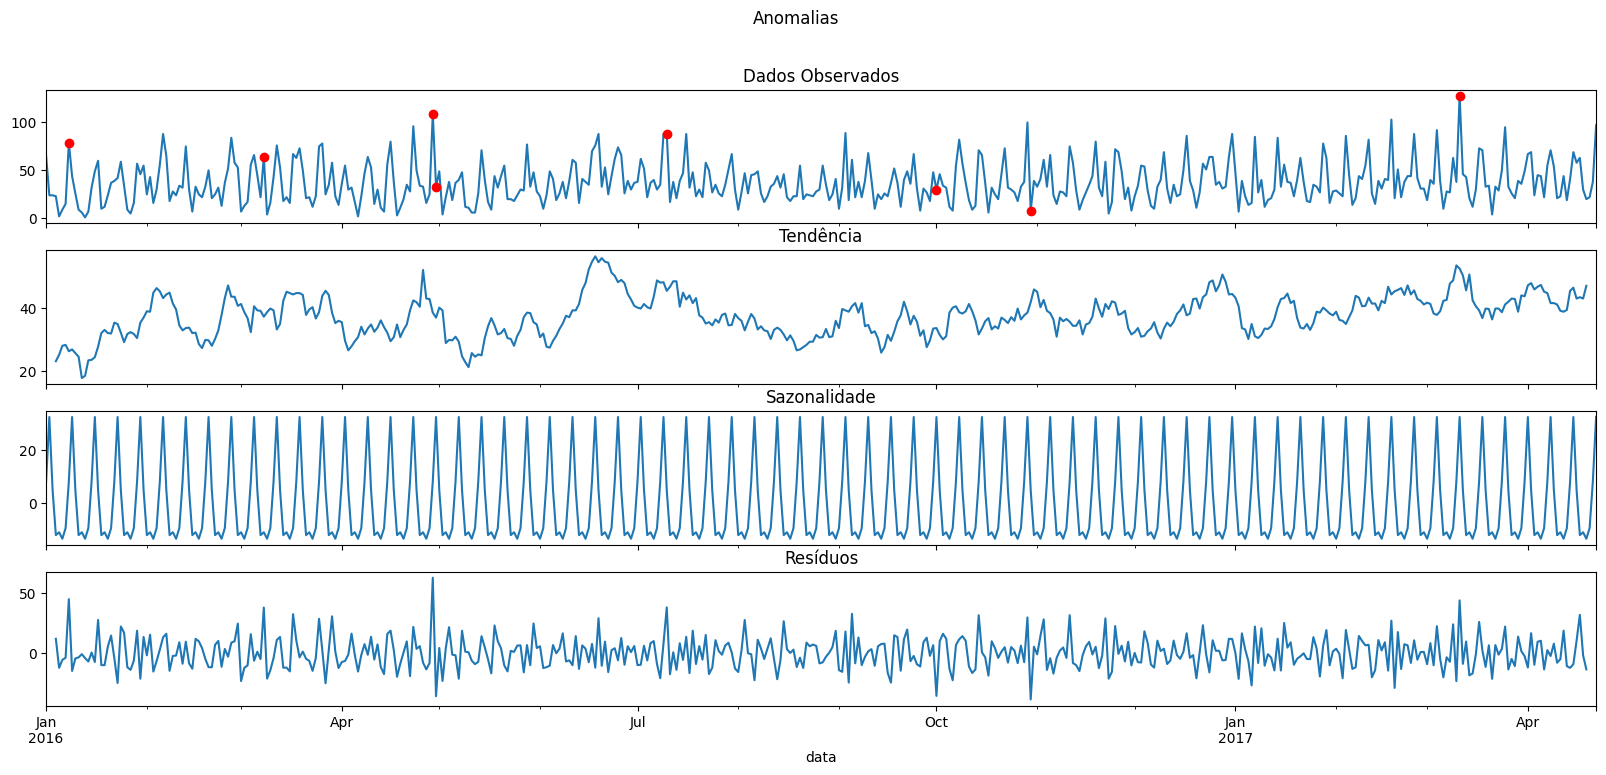

In [69]:
plot_decomposicao(decomposicao_chimi, "Anomalias", anomalias_resid_chimi)

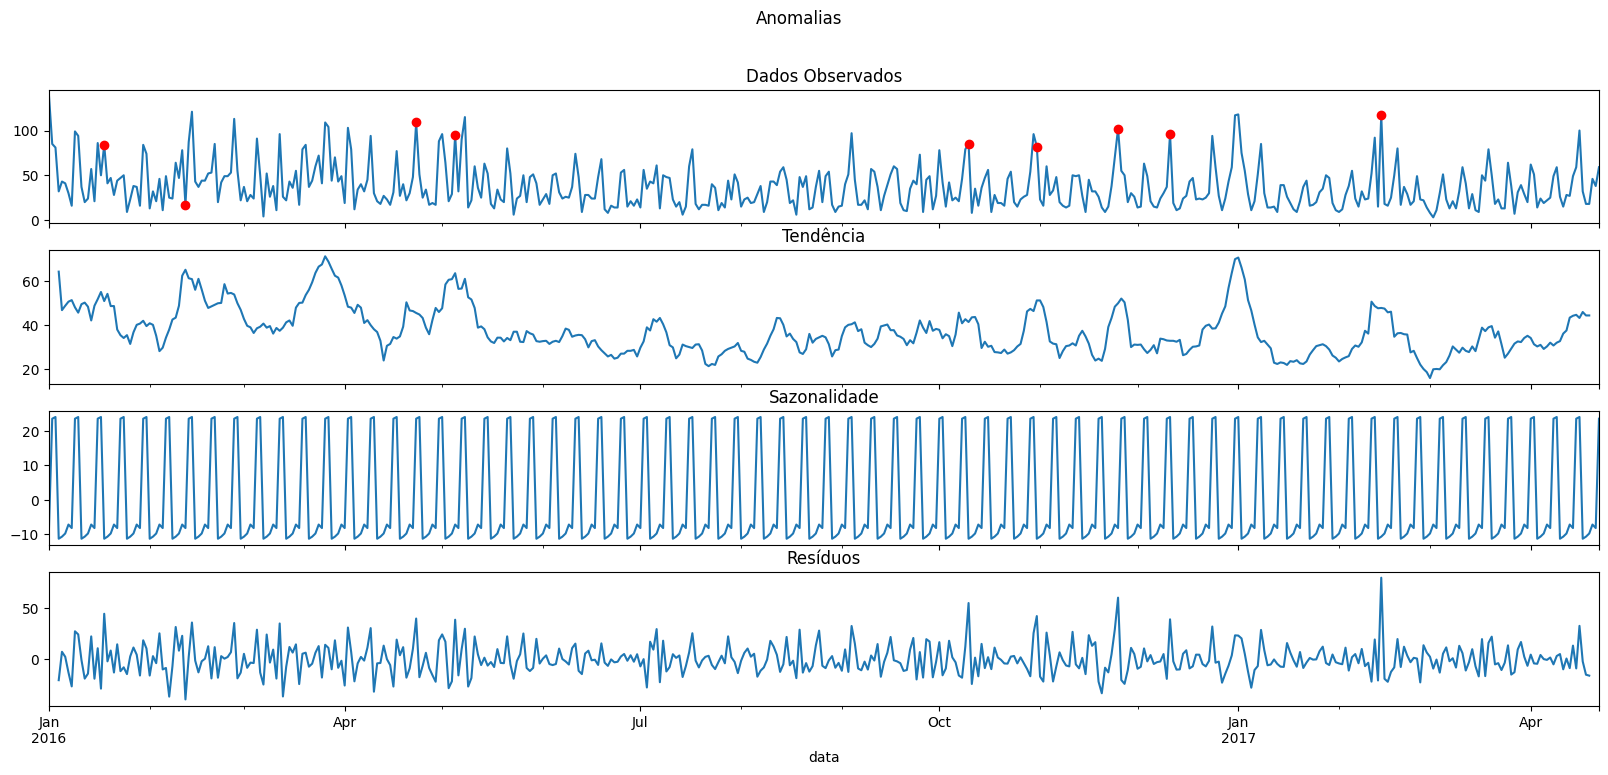

In [70]:
plot_decomposicao(decomposicao_assa, "Anomalias", anomalias_resid_assa)

# Forecasting

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo_chimi = ExponentialSmoothing(data["Chimi & Churri"], seasonal="additive",
                                    seasonal_periods=7, freq="D")
resultado_chimi = modelo_chimi.fit()
previsao_chimi = resultado_chimi.forecast(steps=14)

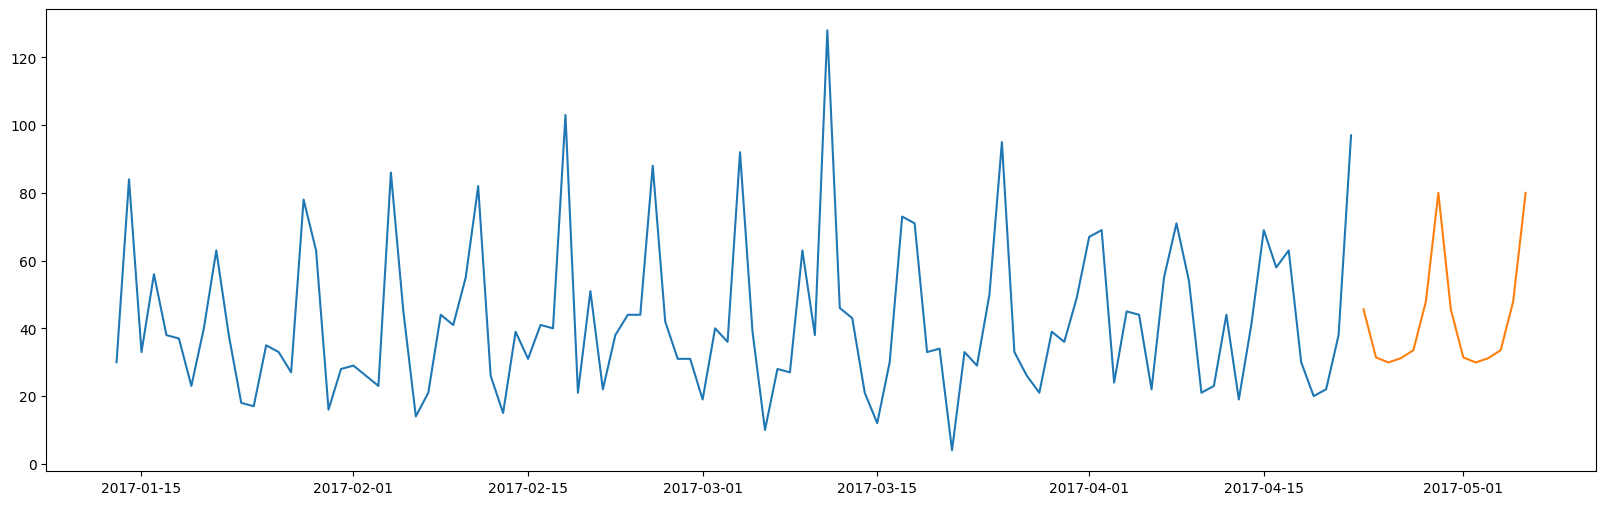

In [75]:
plt.figure(figsize=(20, 6))
plt.plot(data["Chimi & Churri"].index[-100:], data["Chimi & Churri"].values[-100:], label="Dados Históricos")
plt.plot(previsao_chimi.index, previsao_chimi.values, label="Dados Previstos")